In [54]:
import geopandas as gpd
import wikipedia
import re
import pandas as pd
import seaborn as sns
from shapely import wkt
import contextily as cx
import pyproj
from pyproj import Transformer
from shapely.ops import transform
import matplotlib.pyplot as plt
import mapclassify
import numpy as np

In [2]:
streets = gpd.read_file('gis_osm_roads_free_1.shp')

In [86]:
t_s = pd.read_excel('Untitled spreadsheet.xlsx')

In [87]:
t_s

,Unnamed: 0,osm_id,code,fclass,name,type,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,2,3192369,5122,residential,Rruga Brigada VIII,O,NaN,F,20,0,F,F,"LINESTRING (19.817793 41.3223873, 19.8177494 4..."
1,3,3192381,5122,residential,Rruga Emin Duraku,M,NaN,F,30,0,F,F,"LINESTRING (19.8086264 41.3196481, 19.8087541 ..."
2,4,3192411,5122,residential,NaN,NaN,NaN,F,0,0,F,F,"LINESTRING (19.8156603 41.3195312, 19.8157016 ..."
3,5,3192422,5122,residential,Rruga Vaso Pasha,M,NaN,F,30,0,F,F,"LINESTRING (19.8154385 41.3228944, 19.8154526 ..."
4,6,3192445,5123,living_street,Rruga Mihal Popi,M,NaN,F,0,0,F,F,"LINESTRING (19.8069018 41.3200073, 19.8067189 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,145898,1126040640,5122,residential,NaN,NaN,NaN,F,0,0,F,F,"LINESTRING (19.7425312 41.3003006, 19.7421424 ..."
26946,145899,1126040641,5122,residential,NaN,NaN,NaN,F,0,0,F,F,"LINESTRING (19.7421424 41.3003983, 19.7421585 ..."
26947,145902,1126490637,5141,service,NaN,NaN,NaN,B,0,0,F,F,"LINESTRING (19.7096599 41.4201128, 19.7096746 ..."
26948,145903,1126490641,5141,service,NaN,NaN,NaN,B,0,0,F,F,"LINESTRING (19.7128118 41.425444, 19.7128011 4..."


In [88]:
t_s['type'] = np.where(t_s['type'] == 'P', 'O', t_s['type'])

In [89]:
t_s['type'] = np.where(t_s['type'] == 'OO', 'O', t_s['type'])

In [90]:
t_s['type'] = np.where(t_s['type'] == 'F', 'W', t_s['type'])

In [91]:
clean_tirana_streets = t_s.loc[list(t_s[:12475]['name'].dropna().index), :]

In [92]:
gr_type = clean_tirana_streets.groupby(['name', 'type'], as_index = False).count().groupby('type', as_index = False).count()

In [93]:
gr_type

,type,name,Unnamed: 0,osm_id,code,fclass,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,M,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192
1,O,426,426,426,426,426,426,426,426,426,426,426,426
2,W,56,56,56,56,56,56,56,56,56,56,56,56


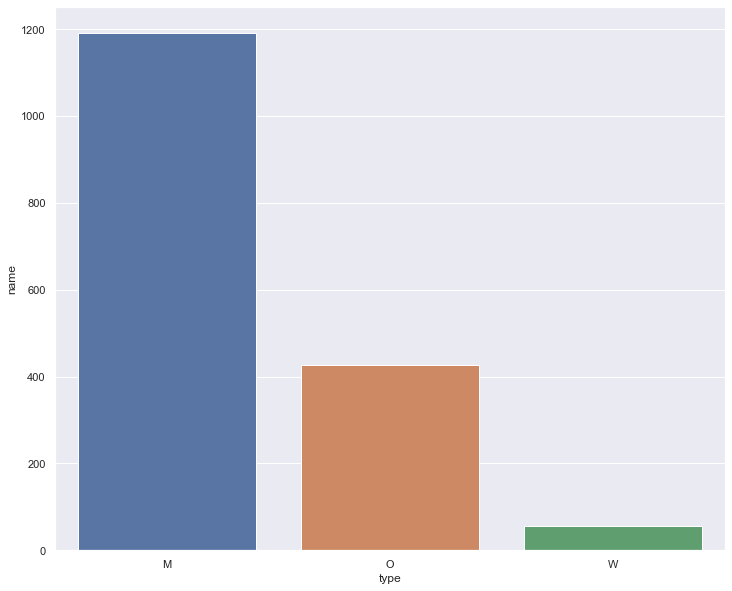

In [94]:
sns.barplot(x = 'type', y = 'name', data = gr_type);

In [95]:
t_s['geometry'] = t_s['geometry'].apply(wkt.loads)
t_s_geo = gpd.GeoDataFrame(t_s, geometry = t_s['geometry'], crs="EPSG:4326")

In [96]:
t_s_geo

,Unnamed: 0,osm_id,code,fclass,name,type,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,2,3192369,5122,residential,Rruga Brigada VIII,O,NaN,F,20,0,F,F,"LINESTRING (19.81779 41.32239, 19.81775 41.322..."
1,3,3192381,5122,residential,Rruga Emin Duraku,M,NaN,F,30,0,F,F,"LINESTRING (19.80863 41.31965, 19.80875 41.319..."
2,4,3192411,5122,residential,NaN,NaN,NaN,F,0,0,F,F,"LINESTRING (19.81566 41.31953, 19.81570 41.319..."
3,5,3192422,5122,residential,Rruga Vaso Pasha,M,NaN,F,30,0,F,F,"LINESTRING (19.81544 41.32289, 19.81545 41.322..."
4,6,3192445,5123,living_street,Rruga Mihal Popi,M,NaN,F,0,0,F,F,"LINESTRING (19.80690 41.32001, 19.80672 41.319..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,145898,1126040640,5122,residential,NaN,NaN,NaN,F,0,0,F,F,"LINESTRING (19.74253 41.30030, 19.74214 41.300..."
26946,145899,1126040641,5122,residential,NaN,NaN,NaN,F,0,0,F,F,"LINESTRING (19.74214 41.30040, 19.74216 41.300..."
26947,145902,1126490637,5141,service,NaN,NaN,NaN,B,0,0,F,F,"LINESTRING (19.70966 41.42011, 19.70967 41.420..."
26948,145903,1126490641,5141,service,NaN,NaN,NaN,B,0,0,F,F,"LINESTRING (19.71281 41.42544, 19.71280 41.425..."


### Street Types

In [97]:
gr_type = t_s_geo.drop_duplicates(subset = 'name').groupby(['type', 'fclass'], as_index = False).count()

In [98]:
gr_type.head()

,type,fclass,Unnamed: 0,osm_id,code,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,M,footway,2,2,2,2,0,2,2,2,2,2,2
1,M,living_street,111,111,111,111,0,111,111,111,111,111,111
2,M,path,1,1,1,1,0,1,1,1,1,1,1
3,M,pedestrian,7,7,7,7,0,7,7,7,7,7,7
4,M,primary,15,15,15,15,2,15,15,15,15,15,15


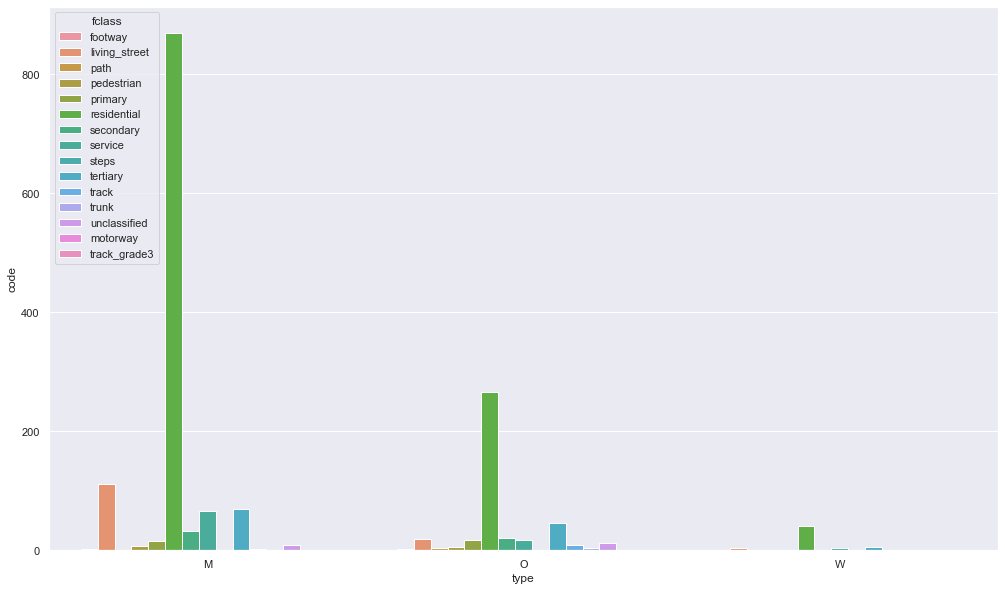

In [103]:
sns.set(rc={'figure.figsize':(17, 10)})
sns.barplot(data = gr_type, x = 'type', y = 'code', hue = 'fclass');

Residential? 
- the definition: The highway=residential tag is used on roads that provide access to, or within, residential areas but which are not normally used as through routes. 


Living Street?
- These type of roads have lower speed limits, and special traffic and parking rules compared to streets tagged using residential.

### Street Lengths 

In [104]:
transformer = Transformer.from_crs("epsg:4326", "epsg:32633")
lengths_new = []
for g in range(26950):
    lengths_new.append(transform(transformer.transform, t_s_geo['geometry'][g]).length)

In [105]:
t_s_geo['street_lengths'] = lengths_new

In [106]:
t_s_geo_cl = t_s_geo.drop_duplicates(subset = 'name')

,type,Unnamed: 0,osm_id,code,maxspeed,layer,street_lengths
0,M,24853.965459,2.488304e+08,5122.538332,3.807919,0.002527,259.382371
1,O,21449.191038,2.184826e+08,5122.080189,7.264151,0.021226,592.947756
2,W,24031.963636,2.423433e+08,5122.745455,3.545455,0.000000,237.748064


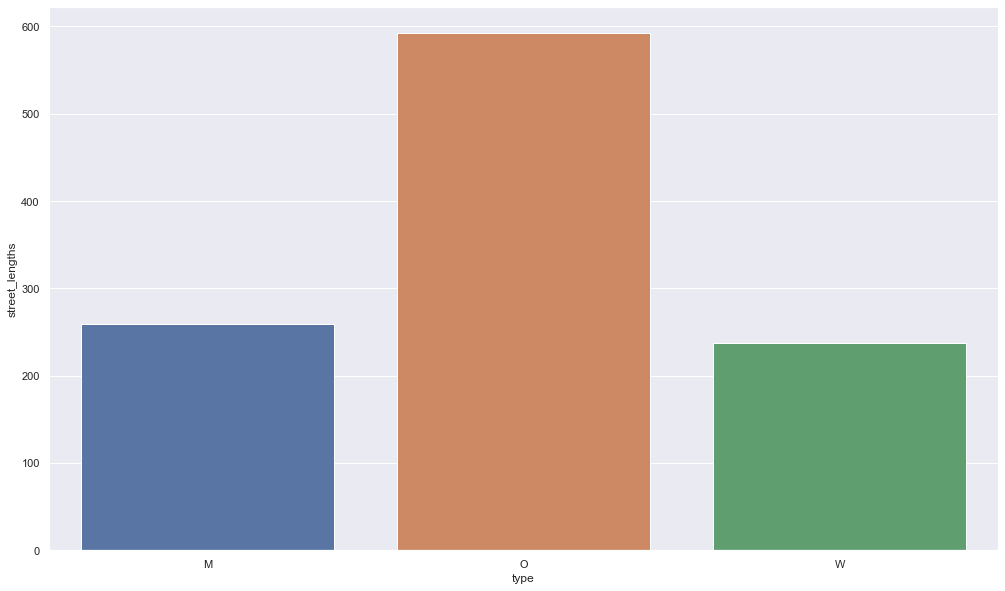

In [110]:
sns.barplot(x = 'type', y = 'street_lengths', data = t_s_geo_cl.groupby('type', as_index = False).mean());

In [111]:
t_s_geo_cl.groupby('type').sum()

,Unnamed: 0,osm_id,code,maxspeed,layer,street_lengths
type,,,,,,
M,29501657,295361685113,6080453,4520,3,307886.874432
O,9094457,92636636430,2171762,3080,9,251409.848350
W,1321758,13328880013,281751,195,0,13076.143546


In [112]:
# streets with Women Names are on average shorter than those named after men
# streets named "other" are much longer, interestingly (some of those are the highway and the inter-city roads)

### Map Visualizations

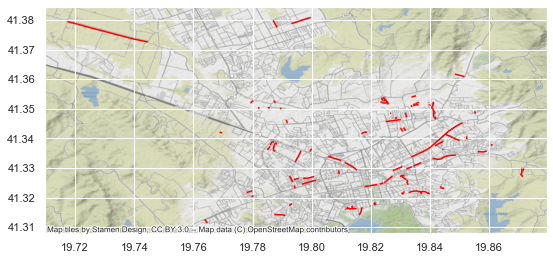

In [116]:
ax = t_s_geo[t_s_geo['type'] == 'W'].plot(color="red", figsize=(9, 9))
cx.add_basemap(ax, crs=t_s_geo[t_s_geo['type'] == 'W'].crs.to_string())

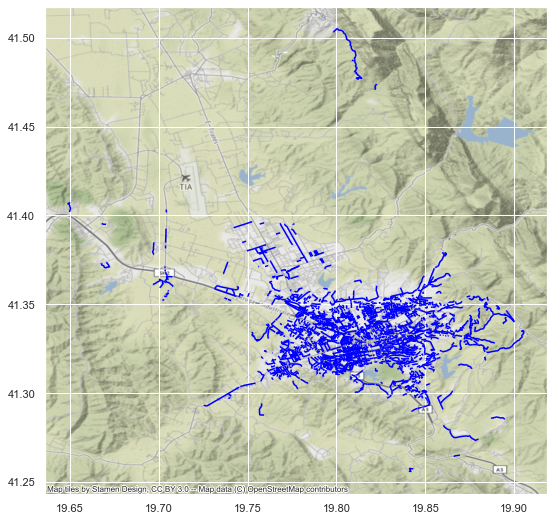

In [114]:
ax = t_s_geo[t_s_geo['type'] == 'M'].plot(color="blue", figsize=(9, 9))
cx.add_basemap(ax, crs=t_s_geo[t_s_geo['type'] == 'M'].crs.to_string())

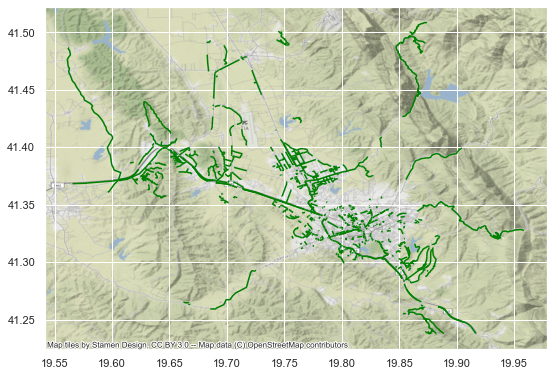

In [115]:
ax = t_s_geo[t_s_geo['type'] == 'O'].plot(color="green", figsize=(9, 9))
cx.add_basemap(ax, crs=t_s_geo[t_s_geo['type'] == 'O'].crs.to_string())

In [20]:
# more analysis on O

## Professions

In [21]:
# analysis on the professions and life work of the people being featured in the street names
# women and men

Politics: Erisa Fatmir Poleshi, Zana Floqi, Musine Kokalari

Humanitarian and Religious: Nene Tereza, Xhovana De Lestonnac

Communism Victim: Lavdie Petrela

Art: Vace Zela, Marie Kraja, Tefta Tashko Koco, Jorgjia Truja, Luçie Miloti, Fitnete Rexha, Gjuzepina Kosturi, Androniçi Zengo Antoniu, Violeta Manushi, Dhorkë Orgocka, Behije Cela, Marie Logoreci, Kristina Koljaka, Lola Gjoka, Lili Tafaj, Valentina Pistoli (17)

War: Shote Galica, Jean D'Arc, Mine Peza, Persefoni Kokëdhima, Frosina Plaku, Ana Shllaku, Zonja Çurre, Inajete Dumi, Shejnaze Juka, Ylbere Bylykbashi, Ganimete Tërbeshi, Vojsava Kastrioti, Mamica Kastrioti, Bule Naipi

Teacher, Writer, Researcher: Alie Këlliçi, Sevasti Qiriazi, Dora D'Istria, Edit Durham, Oksana Budina, Minella Karajani, Nina Dimitrjevna Smirnova



In [22]:
t_s_geo_cl[t_s_geo_cl['type'] == 'F']

,Unnamed: 0,osm_id,code,fclass,name,type,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,street_lengths
98,387,30823489,5122,residential,Rruga Vaçe Zela,F,NaN,F,0,0,F,F,"LINESTRING (19.79408 41.32400, 19.79410 41.323...",50.751317
217,626,41488032,5115,tertiary,Rruga Erisa Fatmir Poleshi,F,NaN,F,0,0,F,F,"LINESTRING (19.78762 41.35199, 19.78761 41.352...",116.786296
220,629,41488260,5122,residential,Rruga Rozafa,F,NaN,B,0,0,F,F,"LINESTRING (19.79967 41.38093, 19.79866 41.380...",831.444889
376,1179,44960052,5122,residential,Rruga Zana Floqi,F,NaN,B,0,0,F,F,"LINESTRING (19.85243 41.33978, 19.85239 41.340...",107.207413
380,1183,44960061,5122,residential,Rruga Shotë Galica,F,NaN,B,0,0,F,F,"LINESTRING (19.86107 41.33800, 19.86090 41.337...",78.057623
381,1184,44960063,5141,service,Violeta Manushi,F,NaN,B,0,0,F,F,"LINESTRING (19.84417 41.33615, 19.84437 41.33636)",33.953856
390,1193,44960851,5115,tertiary,Rruga Marie Kraja,F,NaN,B,0,0,F,F,"LINESTRING (19.84992 41.33926, 19.84978 41.339...",251.317244
410,1213,45029608,5122,residential,Rruga Dhorkë Orgocka,F,NaN,B,0,0,F,F,"LINESTRING (19.85916 41.33571, 19.85904 41.335...",377.239652
1251,2287,51680778,5122,residential,Rruga Margarita Tutulani,F,NaN,F,20,0,F,F,"LINESTRING (19.81514 41.31629, 19.81511 41.316...",313.771396
1472,3824,109616854,5115,tertiary,Rruga Nënë Tereza,F,NaN,B,0,0,F,F,"LINESTRING (19.71739 41.37953, 19.71987 41.378...",437.404489


In [117]:
values_prof = pd.DataFrame({"Art":17,
"War": 14,
"Teacher, Writer or Researcher": 7,
"Politics": 3,
"Humanitarian and Religious": 2
             }, index = range(0, 5) ).T

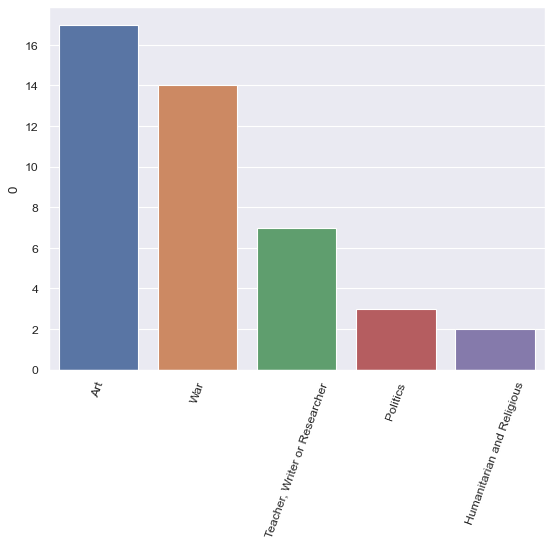

In [118]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
sns.barplot(x = list(values_prof.index), y = 0, data = values_prof);
plt.xticks(rotation=70);

## Looking more in depth at the longest streets

In [25]:
# female
tirana_street_sum = t_s_geo_cl.groupby(['name', 'type'], as_index = False).sum()
f_ts = tirana_street_sum[tirana_street_sum['type'] == 'F'].sort_values('street_lengths', ascending = False).head(10)

In [26]:
f_ts['geometry'] = t_s_geo[t_s_geo['name'].isin(f_ts['name'])].drop_duplicates(subset = 'name')['geometry'].unique()

In [27]:
f_ts

,name,type,Unnamed: 0,osm_id,code,maxspeed,layer,street_lengths,geometry
74,Bulevardi Zhan d'Ark,F,9561,172205838,5113,50,0,994.882531,"LINESTRING (19.79967 41.38093, 19.79866 41.380..."
1242,Rruga Rozafa,F,629,41488260,5122,0,0,831.444889,"LINESTRING (19.71739 41.37953, 19.71987 41.378..."
979,Rruga Luçie Miloti,F,11490,174799625,5115,0,0,635.872002,"LINESTRING (19.84871 41.33438, 19.84855 41.334..."
1463,Rruga Ylbere Bylykbashi,F,28987,278711060,5122,0,0,605.367537,"LINESTRING (19.82748 41.32916, 19.82793 41.329..."
644,Rruga Fitnete Rexha,F,21394,229669091,5122,0,0,469.061505,"LINESTRING (19.78816 41.33840, 19.78812 41.338..."
416,Rruga Androniçi Zengo Antoniu,F,10704,173614264,5122,30,0,442.402585,"LINESTRING (19.83015 41.34638, 19.82957 41.346..."
1121,Rruga Nënë Tereza,F,3824,109616854,5115,0,0,437.404489,"LINESTRING (19.84110 41.35240, 19.84109 41.352..."
401,Rruga Ana Komnena,F,56586,464183230,5122,0,0,435.172346,"LINESTRING (19.79661 41.32453, 19.79709 41.324..."
1437,Rruga Vojsava Kastrioti,F,50647,436566557,5122,0,0,407.287392,"LINESTRING (19.85165 41.36094, 19.85160 41.360..."
1367,Rruga Tefta Tashko Koco,F,10437,173433376,5122,0,0,404.493126,"LINESTRING (19.79462 41.33248, 19.79526 41.333..."


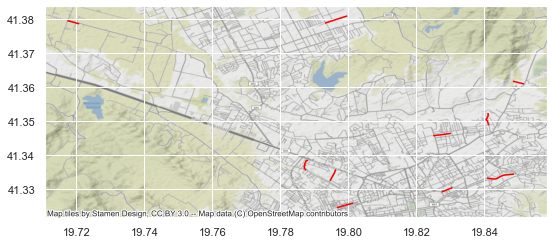

In [28]:
# plot on map
f_ts_geo = gpd.GeoDataFrame(f_ts, geometry = f_ts['geometry'], crs="EPSG:4326")
ax = f_ts_geo.plot(color="red", figsize=(9, 9))
cx.add_basemap(ax, crs=f_ts_geo.crs.to_string())

In [29]:
# male
m_ts = tirana_street_sum[tirana_street_sum['type'] == 'M'].sort_values('street_lengths', ascending = False).iloc[:20, :]

In [30]:
m_ts['geometry'] = t_s_geo[t_s_geo['name'].isin(m_ts['name'])].drop_duplicates(subset = 'name')['geometry'].unique()

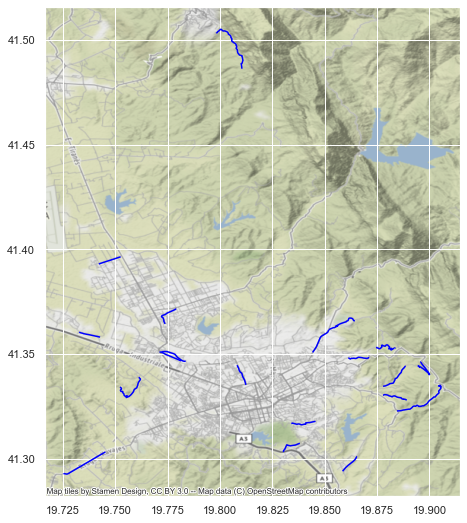

In [31]:
# plot on map
m_ts_geo = gpd.GeoDataFrame(m_ts, geometry = m_ts['geometry'], crs="EPSG:4326")
ax = m_ts_geo.plot(color="blue", figsize=(9, 9))
cx.add_basemap(ax, crs=m_ts_geo.crs.to_string())

In [32]:
m_ts_geo

,name,type,Unnamed: 0,osm_id,code,maxspeed,layer,street_lengths,geometry
503,Rruga Bilal Troksi,M,21595,232047804,5115,0,0,3514.692012,"LINESTRING (19.74219 41.39306, 19.74250 41.393..."
221,Lek Zaharia,M,53696,451788391,5121,0,0,3330.427111,"LINESTRING (19.84424 41.35083, 19.84434 41.350..."
962,Rruga Llazi Miho,M,11719,175776019,5113,40,0,2754.687066,"LINESTRING (19.83041 41.30328, 19.83039 41.303..."
192,Kasem Aushi,M,27241,265081414,5122,0,0,2497.012178,"LINESTRING (19.81241 41.33535, 19.81240 41.335..."
624,Rruga Fehim Zavalani,M,14773,184330299,5115,30,0,2004.174009,"LINESTRING (19.78365 41.34664, 19.78336 41.346..."
1563,Shaban Karaj,M,55365,461164882,5121,0,0,1845.396442,"LINESTRING (19.83409 41.31683, 19.83413 41.316..."
146,Hamdi Gjuzi,M,27838,267927701,5121,0,0,1836.479918,"LINESTRING (19.74534 41.30334, 19.74519 41.303..."
1157,Rruga Petrit Radovicka,M,11117,174150363,5114,40,0,1683.337223,"LINESTRING (19.85854 41.29414, 19.85970 41.295..."
455,Rruga Bajram Deliu,M,14783,184330311,5142,0,0,1657.822662,"LINESTRING (19.77208 41.35100, 19.77211 41.350..."
1080,Rruga Myslym Keta,M,1316,45317104,5113,0,0,1604.507571,"LINESTRING (19.85193 41.36174, 19.85199 41.361..."


## Looking at neighborhoods:

In [138]:
admin_areas = gpd.read_file('nj_sit__administrative.geojson')

In [139]:
street_neighborhoods = gpd.sjoin(t_s_geo_cl, admin_areas)

In [140]:
street_neighborhoods.loc[street_neighborhoods['nr_njesie'] == '04', 'nr_njesie'] = 4

In [141]:
street_neighborhoods['nr_njesie'] = street_neighborhoods['nr_njesie'].map(lambda x: int(x))

In [142]:
urban_tirana = street_neighborhoods[street_neighborhoods['nr_njesie'] <= 14]

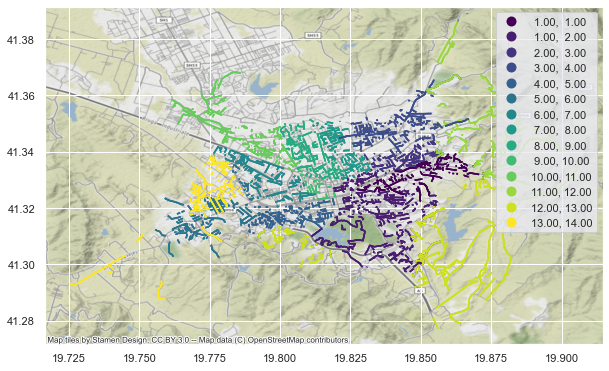

In [143]:
ax = urban_tirana.plot(column="nr_njesie", legend = True, figsize=(10, 10), scheme="User_Defined"
                              ,classification_kwds=dict(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))
cx.add_basemap(ax, crs=street_neighborhoods.crs.to_string())

In [144]:
grouped_njesi_type = urban_tirana.groupby(['nr_njesie', 'type'], as_index = False).count()

In [145]:
grouped_njesi_type

,nr_njesie,type,Unnamed: 0,osm_id,code,fclass,name_left,ref,oneway,maxspeed,...,tunnel,geometry,street_lengths,index_right,id,emertimi,njesia_adm,name_right,_umap_options,description
0,1,M,228,228,228,228,228,0,228,228,...,228,228,228,228,228,228,228,228,228,228
1,1,O,36,36,36,36,36,0,36,36,...,36,36,36,36,36,36,36,36,36,36
2,1,W,12,12,12,12,12,0,12,12,...,12,12,12,12,12,12,12,12,12,12
3,2,M,558,558,558,558,558,0,558,558,...,558,558,558,558,558,558,558,558,558,0
4,2,O,63,63,63,63,63,3,63,63,...,63,63,63,63,63,63,63,63,63,0
5,2,W,21,21,21,21,21,0,21,21,...,21,21,21,21,21,21,21,21,21,0
6,3,M,210,210,210,210,210,0,210,210,...,210,210,210,210,210,210,210,210,210,0
7,3,O,12,12,12,12,12,0,12,12,...,12,12,12,12,12,12,12,12,12,0
8,3,W,15,15,15,15,15,0,15,15,...,15,15,15,15,15,15,15,15,15,0
9,4,M,306,306,306,306,306,3,306,306,...,306,306,306,306,306,306,306,306,306,0


In [146]:
grouped_njesi = urban_tirana.groupby(['nr_njesie'], as_index = False).count()

In [147]:
grouped_njesi

,nr_njesie,Unnamed: 0,osm_id,code,fclass,name_left,type,ref,oneway,maxspeed,...,tunnel,geometry,street_lengths,index_right,id,emertimi,njesia_adm,name_right,_umap_options,description
0,1,291,291,291,291,291,276,0,291,291,...,291,291,291,291,291,291,291,291,291,291
1,2,681,681,681,681,681,642,3,681,681,...,681,681,681,681,681,681,681,681,681,0
2,3,255,255,255,255,255,237,0,255,255,...,255,255,255,255,255,255,255,255,255,0
3,4,363,363,363,363,363,348,3,363,363,...,363,363,363,363,363,363,363,363,363,0
4,5,369,369,369,369,366,351,0,369,369,...,369,369,369,369,369,369,369,369,369,0
5,6,384,384,384,384,384,351,6,384,384,...,384,384,384,384,384,384,384,384,384,0
6,7,297,297,297,297,297,291,6,297,297,...,297,297,297,297,297,297,297,297,297,0
7,8,300,300,300,300,300,294,0,300,300,...,300,300,300,300,300,300,300,300,300,0
8,9,375,375,375,375,375,351,0,375,375,...,375,375,375,375,375,375,375,375,375,0
9,10,99,99,99,99,99,93,0,99,99,...,99,99,99,99,99,99,99,99,99,0


In [151]:
joined_w_total = grouped_njesi_type.join(grouped_njesi, on = 'nr_njesie',lsuffix='_left', rsuffix='_right')

In [156]:
joined_w_total = joined_w_total.sort_values('type_left', ascending = False)

In [159]:
joined_w_total

,nr_njesie_left,type_left,Unnamed: 0_left,osm_id_left,code_left,fclass_left,name_left_left,ref_left,oneway_left,maxspeed_left,...,geometry_right,street_lengths_right,index_right_right,id_right,emertimi_right,njesia_adm_right,name_right_right,_umap_options_right,description_right,Proportions
20,7,W,21,21,21,21,21,0,21,21,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,0.0,0.070000
26,9,W,3,3,3,3,3,0,3,3,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0.0,0.030303
2,1,W,12,12,12,12,12,0,12,12,...,681.0,681.0,681.0,681.0,681.0,681.0,681.0,681.0,0.0,0.017621
37,13,W,6,6,6,6,6,0,6,6,...,294.0,294.0,294.0,294.0,294.0,294.0,294.0,294.0,0.0,0.020408
17,6,W,9,9,9,9,9,0,9,9,...,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,0.0,0.030303
5,2,W,21,21,21,21,21,0,21,21,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.082353
23,8,W,3,3,3,3,3,0,3,3,...,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,0.0,0.008000
32,11,W,6,6,6,6,6,0,6,6,...,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,0.0,0.025316
8,3,W,15,15,15,15,15,0,15,15,...,363.0,363.0,363.0,363.0,363.0,363.0,363.0,363.0,0.0,0.041322
29,10,W,6,6,6,6,6,0,6,6,...,330.0,330.0,330.0,330.0,330.0,330.0,330.0,330.0,0.0,0.018182


In [157]:
joined_w_total['Proportions'] = joined_w_total['Unnamed: 0_left']/joined_w_total['Unnamed: 0_right']

In [160]:
w_prop = joined_w_total.drop_duplicates(subset=['nr_njesie_left'])[['nr_njesie_left', 'type_left', 'Proportions']].sort_values('Proportions', ascending = False) = joined_w_total.drop_duplicates(subset=['nr_njesie_left'])[['nr_njesie_left', 'type_left', 'Proportions']].sort_values('Proportions', ascending = False)

In [163]:
w_prop[w_prop['type_left'] == 'W']

,nr_njesie_left,type_left,Proportions
11,4,W,0.097561
5,2,W,0.082353
20,7,W,0.070000
8,3,W,0.041322
14,5,W,0.039062
26,9,W,0.030303
17,6,W,0.030303
32,11,W,0.025316
37,13,W,0.020408
29,10,W,0.018182


### getting the data to work + misc

In [43]:
tirana = streets.cx[19.6:19.9, 41.2:41.5]

In [45]:
tirana['name'].dropna()

2                   Rruga Brigada VIII
3                    Rruga Emin Duraku
5                     Rruga Vaso Pasha
6                     Rruga Mihal Popi
7                  Rruga Nikolla Jorga
                      ...             
145347                    Unaza Lindje
145425    Rruga Dëshmorët e 4 Shkurtit
145427             Rruga Dora D'Istria
145428    Rruga Dëshmorët e 4 Shkurtit
145570             Rruga Andrea Aleksi
Name: name, Length: 6866, dtype: object

In [ ]:
# wikipedia: if contains a "he", vs if contains a "she" [in the first 3-5 sentences]
# Regex: Rruga  

In [19]:
other_r = r"Rruga [a-zA-Z]+ [a-zA-Z]+"

<re.Match object; span=(0, 16), match='Rruga Seit Teqja'>

In [23]:
j_v = wikipedia.page("Ramiz Aranitasi")

In [24]:
j_v.content.split('.')[:5]

["The Hero of the People (Albanian: Hero i Popullit; Heroinë e Popullit) was the highest title bestowed upon the citizens of the People's Socialist Republic of Albania",
 "\n\n\n== Creation ==\nFounded on July 9, 1945, the title was awarded by the Presidium of the People's Assembly acting on a recommendation from the government",
 ' The main recipients were soldiers, officers, warrant officers, and generals in both the armed forces and in the Ministry of the Interior',
 ' The motives for issuing the award were as follows:\n\nFor heroic acts in the accomplishment of duties while defending the territory of Albania;\nFor personal or collective heroic accomplishments in time of war;\nFor courage and resolve in directing military units to victory against the enemy under difficult combat situations, thus rendering a great service to the state and to the people',
 '\n\n\n== Recipients ==\nRecipients received a certificate of the title as well as the badge (medallion)']

In [14]:
regex = r"He"

In [17]:
re.search(regex, j_v.content.split('.')[2])

<re.Match object; span=(1, 3), match='He'>